# Расчёт Trolox equivalent antioxidant capacity (TEAC)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Загружаем данные

In [2]:
data = pd.read_csv('data/exampl.csv', sep=';')
data.head(10)

,name,conc,0 min,1 min,2 min,3 min,4 min,5 min,6 min,7 min,...,30 min,31 min,32 min,33 min,34 min,35 min,36 min,37 min,38 min,39 min
0,H2O,0,1.544,1.536,1.524,1.528,1.517,1.521,1.519,1.510,...,1.460,1.451,1.454,1.446,1.450,1.451,1.445,1.431,1.446,1.432
1,H2O,0,1.512,1.508,1.497,1.512,1.498,1.490,1.505,1.491,...,1.444,1.445,1.439,1.433,1.436,1.440,1.427,1.429,1.428,1.419
2,H2O,0,1.506,1.501,1.489,1.500,1.497,1.492,1.496,1.483,...,1.442,1.442,1.436,1.442,1.440,1.438,1.434,1.439,1.433,1.428
3,H2O,0,1.542,1.531,1.532,1.544,1.529,1.530,1.537,1.525,...,1.471,1.474,1.472,1.464,1.473,1.462,1.456,1.459,1.453,1.450
4,Trolox,35,1.470,1.463,1.458,1.472,1.460,1.472,1.473,1.459,...,1.416,1.408,1.415,1.403,1.409,1.410,1.407,1.396,1.400,1.392
5,Trolox,35,1.476,1.475,1.464,1.470,1.459,1.460,1.461,1.457,...,1.408,1.402,1.399,1.395,1.403,1.402,1.391,1.393,1.393,1.389
6,Trolox,35,1.503,1.491,1.481,1.483,1.484,1.485,1.485,1.478,...,1.435,1.425,1.422,1.426,1.421,1.419,1.412,1.418,1.410,1.408
7,Trolox,35,1.468,1.462,1.458,1.466,1.460,1.461,1.455,1.452,...,1.415,1.413,1.412,1.413,1.411,1.408,1.403,1.407,1.402,1.401
8,Trolox,54,1.452,1.445,1.440,1.451,1.455,1.448,1.453,1.446,...,1.393,1.388,1.385,1.384,1.383,1.380,1.378,1.374,1.370,1.373
9,Trolox,54,1.448,1.443,1.434,1.436,1.431,1.431,1.431,1.428,...,1.385,1.385,1.383,1.378,1.375,1.379,1.371,1.367,1.371,1.363


Для расчёт данным методом нам нужны только значения при конечном времени. Поэтому оставим только их

In [3]:
data = data.loc[:, ['name', 'conc', '39 min ']]

Найдём средние значения поглащение воды

In [4]:
blank = data.loc[data['name'] == 'H2O']['39 min '].mean()
blank

1.43225

Теперь получим разницу между бланком и поглащением в образцах, тем самым - падение концентрации радикала

In [5]:
data['delta'] = blank - data['39 min ']

Теперь посчтиаем каллибровочные коэффициенты по тролоксу. Выберем данные по нему

In [6]:
trolox = data.loc[data['name'] == 'Trolox'].groupby('conc').mean()
trolox

,39 min,delta
conc,,
35,1.39750,0.03475
54,1.37325,0.05900
85,1.35625,0.07600
175,1.26050,0.17175
350,1.03275,0.39950


Построим каллибровочную кривую и посчитаем коэффициенты

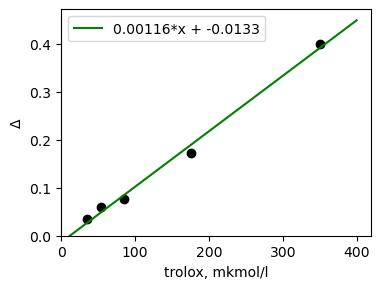

In [7]:
params = np.polyfit(trolox.index, trolox['delta'], 1)

fig, ax = plt.subplots(figsize=(4,3), dpi =100)
ax.plot(trolox.index, trolox['delta'], 'o', color='black')
xp = np.linspace(0, 400, 10)
yp = np.polyval(params, xp)
ax.plot(xp, yp, 'g', label=f'{round(params[0],5)}*x + {round(params[1],4)}')
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel('trolox, mkmol/l')
ax.set_ylabel('Δ')
ax.legend()

соответствующие коэффициенты

In [8]:
a = params[0]
b = params[1]

Рассчитываем антиоксидантную емкость по образцам

In [9]:
data['TEAC'] = (data['delta'] - b) / (data['conc'] * a)

оставим только колнки с названием образца и рассчитаным значением TEAC. Уберём тролокс из данных

In [10]:
data = data.loc[data['name']!='Trolox'].loc[:, ['name', 'TEAC']]

Сгруппируем, найдём стандртное отклонение и среднее

In [11]:
result = data.groupby('name').mean()
std = data.groupby('name').std()
result.columns = ['TEAC, mkmol/mg']
std.columns = ['TEAC,std']

Смержим результат, сохраним в таблице

In [12]:
result = result.merge(std, on='name')
#result.to_csv('data_result.csv', sep=';')
result

,"TEAC, mkmol/mg","TEAC,std"
name,,
FA,2.006162,0.291631
H2O,NaN,NaN
HS,0.911430,0.234884
HS-mod,1.955498,0.122597
